## Brief Description of the Project and the Data Set 
     
     
<span style="color: red;">The data set for this  project was downloaded from  National Health Service (NHS Digital)- England. The major intention of collecting this data is to provide a list of all medicines, dressings and appliances that are prescribed by all practices in England, including GP practices, each month. This data set has three major elements (three major data files).</span>

**File 1: Practice codes, names and addresses file**

All registered practices, including GP practices, in England are included in the data.
Each practice is uniquely identified  by their practice code and also there names and addresses are included.

**File 2: Practice prescribing data file**

This is the main data file which contains practice level prescribing data. Practice prescribing data is a list of all medicines, dressings and appliances that are prescribed and dispensed each month. This is relatively large file which contains  over 10 million records every month.

**File 3:Chemical names and British National Formulary (BNF) code file**

This file can be used to translate the presentation level 15 character BNF code of the main data file (File 2) in to chemical level by using the first 9 characters.

<table>
<tr><th><center>File 1</center></th><th><center> File 2 </center></th><th><center>File 3</center></th></tr>
    
<tr><td>
    
| Parameter     | Description                         |
|---------------|-------------------------------------|
| PERIOD        | YYYYMM                              |
| Practice Code | ANNNNN practice code - 6 characters |
| Practice Name | Name of surgery                     |
| Address 1     | ANY VILLA SURGERY                   |
| Address 2     | 1 ANY ROAD                          |
| Address 3     | ANYTOWN                             |
| Address 4     | ANYSHIRE                            |
| Postcode      | XX2 7XX                             |

</td>
<td>
    
| Parameter | Description                                           |
|-----------|-------------------------------------------------------|
| SHA1      | SHA or AT code - 3 characters                         |
| PCT2      | PCT or CCG code - 3 characters                        |
| PRACTICE  | ANNNNN Practice code - 6 characters                   |
| BNF CODE  | British National Formulary (BNF) code - 15 characters |
| BNF NAME  | BNF presentation name - 40 characters                 |
| ITEMS     | Prescription items dispensed - whole numbers          |
| NIC       | Net ingredient cost - pounds and pence                |
| ACT COST  | Actual cost - pounds and pence                        |
| QUANTITY  | Quantity - whole numbers                              |
| PERIOD    | YYYYMM                                                |
    
 </td>
  <td>

  | Parameter | Description                      |
|-----------|----------------------------------|
| CHEM SUB  | Chemical BNF code - 9 characters |
| NAME      | Chemical Name - 60 characters    |  
    
 </td></tr></table>
 
 <font size="5">**The following links can be used to download and get more information about the data**</font> 
 
1. [<span style="color: blue;">Practice level prescribing data: More Information about the data set can be found here </span>](https://digital.nhs.uk/data-and-information/areas-of-interest/prescribing/practice-level-prescribing-in-england-a-summary/practice-level-prescribing-data-more-information)

 
2. [<span style="color: blue;">Data Sourse - To download data files</span>](https://digital.nhs.uk/data-and-information/publications/statistical/practice-level-prescribing-data)

 
3. [<span style="color: blue;">Glossary of Terms - A detailed description of the terms used in this data set</span>](https://digital.nhs.uk/data-and-information/areas-of-interest/prescribing/practice-level-prescribing-in-england-a-summary/practice-level-prescribing-glossary-of-terms)


In [1]:
" Importing modules  "
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)
#print(sys.path)

#import tensorflow as tf
#from tensorflow import keras
#assert tf.__version__ >= "2.0"

import pandas as pd
import numpy as np
import os

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "datainsight"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)


" Centering the images"
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

In [2]:
class color:
    "Simple utility class for text fromatting. I can pass these class attributes to the print funtions"
    
    purple,cyan,darkcyan = '\033[95m','\033[96m','\033[36m'
    blue,green,yellow,red  = '\033[94m','\033[92m','\033[93m','\033[91m'
    bold,underline,end = '\033[1m','\033[4m','\033[0m'
      

## Loading data and exploration

In [3]:
" Loading the data related to doctors', codes, names and addresses"

print(color.bold +"Loading practice codes, names and addresses file (File 1)")

col_names_practice=[ 'PERIOD','CODE' ,'NAME', 'ADDR_1', 'ADDR_2', 'ADDR_3', 'ADDR_4', 'POST CODE']
practice_info = pd.read_csv('./2019_December/2019_Dec_PracticeCodes_Names_Addresses.csv',index_col=False,
                           header=None,names=col_names_practice)

print(color.blue + color.bold + color.underline + 'Practice Codes, Names, and Addresses:' + color.end)
practice_info.info()
practice_info.sort_values('CODE').head(2)

Loading practice codes, names and addresses file (File 1)
Practice Codes, Names, and Addresses:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9324 entries, 0 to 9323
Data columns (total 8 columns):
PERIOD       9324 non-null int64
CODE         9324 non-null object
NAME         9324 non-null object
ADDR_1       9323 non-null object
ADDR_2       8656 non-null object
ADDR_3       8989 non-null object
ADDR_4       7455 non-null object
POST CODE    9323 non-null object
dtypes: int64(1), object(7)
memory usage: 582.9+ KB


,PERIOD,CODE,NAME,ADDR_1,ADDR_2,ADDR_3,ADDR_4,POST CODE
5696,201912,A81001,THE DENSHAM SURGERY,THE HEALTH CENTRE,LAWSON STREET,STOCKTON-ON-TEES,CLEVELAND,TS18 1HU
8573,201912,A81002,QUEENS PARK MEDICAL CENTRE,QUEENS PARK MEDICAL CTR,FARRER STREET,STOCKTON ON TEES,CLEVELAND,TS18 2AW


In [4]:
" Loading the prescriptions data (File 2). Large-file and it may take some time to load"

print(color.bold +"Loading prescribing data file (File 2)")

presc_info = pd.read_csv('./2019_December/2019_Dec_Practice_Prescribing_Data.csv',index_col=False)

print(color.blue + color.bold + color.underline + 'Prescription Data:' + color.end)
presc_info.info()
presc_info.sort_values('PRACTICE').head(2)

Loading prescribing data file (File 2)
Prescription Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9353682 entries, 0 to 9353681
Data columns (total 10 columns):
SHA         object
PCT         object
PRACTICE    object
BNF CODE    object
BNF NAME    object
ITEMS       int64
NIC         float64
ACT COST    float64
QUANTITY    float64
PERIOD      int64
dtypes: float64(3), int64(2), object(5)
memory usage: 713.6+ MB


,SHA,PCT,PRACTICE,BNF CODE,BNF NAME,ITEMS,NIC,ACT COST,QUANTITY,PERIOD
344758,Q45,00K,A81001,21240000120,Almus Sod Chlor 0.9% Nsl Dps,1,0.99,0.93,1.0,201912
344409,Q45,00K,A81001,0802010G0AAAEAE,Azathioprine_Tab 50mg,7,9.90,9.79,224.0,201912


In [5]:
"Loading the Chemical  data (File 3)"

print(color.bold + "Chemical names and British National Formulary (BNF) code file (File 3)")
 
chemi_info = pd.read_csv('./2019_December/2019_Dec_ChemicalNames_BNFCodes.csv',index_col=False)
print(color.blue + color.bold + color.underline + 'Chemical Names and BNF Codes:' + color.end)
chemi_info.info()
chemi_info.head(2)

Chemical names and British National Formulary (BNF) code file (File 3)
Chemical Names and BNF Codes:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3510 entries, 0 to 3509
Data columns (total 2 columns):
CHEM SUB    3510 non-null object
NAME        3510 non-null object
dtypes: object(2)
memory usage: 55.0+ KB


,CHEM SUB,NAME
0,0104020D0,Codeine Phosphate Compound Mixtures
1,0104020H0,Co-Phenotrope (Diphenox HCl/Atrop Sulph)


## Descriptive statistics for 'N' most  prescribed items

Finding the most prescribed items can be help for medical supply companies. When the medical supply companies know the prescription rates of the items they can keep the production at an optimal level to meet the demand and maximize the profit. They can pay more attention to the items with high demand.

In [6]:
" Top N most prescribed items."
" Group by BNF Code, aggregate by items summation and sort the elements decending order "


N = 10 # 1<N<len(unique(BNF))
agg_bnfcode    = presc_info.groupby('BNF CODE').agg({'ITEMS':'sum'}).sort_values('ITEMS',ascending=False)
topN_bnfcode  = list(agg_bnfcode.index[0:N])
print(color.blue + color.bold + "Top {} most prescribed items:\n".format(N)+color.end,topN_bnfcode) 

topN_data = presc_info[presc_info['BNF CODE'].isin(topN_bnfcode)]
print(color.bold + "\n Data set is filtered by top {} most prescribed items\n".format(N)+color.end)
topN_data.head()

Top 10 most prescribed items:
 ['0103050P0AAAAAA', '0212000B0AAABAB', '0206020A0AAAAAA', '0103050L0AAAAAA', '0209000A0AAABAB', '0407010H0AAAMAM', '0601022B0AAABAB', '0212000B0AAACAC', '0301011R0AAAPAP', '0206020A0AAABAB']

 Data set is filtered by top 10 most prescribed items



,SHA,PCT,PRACTICE,BNF CODE,BNF NAME,ITEMS,NIC,ACT COST,QUANTITY,PERIOD
33,Q44,01C,N81002,0103050L0AAAAAA,Lansoprazole_Cap 30mg (E/C Gran),190,312.69,294.51,7175.0,201912
37,Q44,01C,N81002,0103050P0AAAAAA,Omeprazole_Cap E/C 20mg,524,841.84,791.20,23338.0,201912
228,Q44,01C,N81002,0206020A0AAAAAA,Amlodipine_Tab 5mg,349,458.14,430.87,15092.0,201912
229,Q44,01C,N81002,0206020A0AAABAB,Amlodipine_Tab 10mg,162,207.52,195.80,6678.0,201912
285,Q44,01C,N81002,0209000A0AAABAB,Aspirin Disper_Tab 75mg,278,335.44,316.04,10920.0,201912


Generating box-plots to visualize the precription pattern (Number of Items) distributions of the 'N' mostly prescribed items. This plot will give information related to min, Q1, Q2, Q3, 1.5IQR, and outliers of the distributions. I generated these plots to get an idea of descriptive statistics of the number of items prescribed.


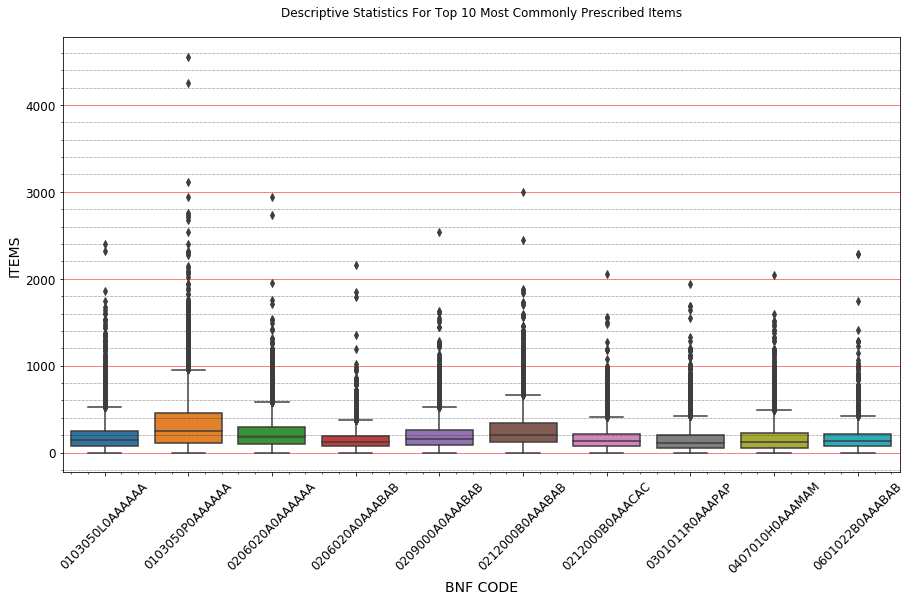

In [7]:
" Creating a box plot  to visualize the prescription pattern distribution "
fig, ax = plt.subplots(figsize=(15, 8))  
plt.minorticks_on()
plt.xticks(rotation=45)
plt.grid(which='major', linestyle='-', linewidth='0.5', color='red',axis='y')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black',axis='y')

plt.title("Descriptive Statistics For Top {} Most Commonly Prescribed Items\n".format(N))
sns.boxplot(x='BNF CODE', y='ITEMS',  data=topN_data, ax=ax)
plt.show() 

An interesting fact about the above plot is that you can see each medicine (BNF Code) has one or two extremely deviated points. I decided to check whether there is a relationship between these points and the doctor who issued this prescription.

In [8]:
"Find any existing relationship between max items prescribed and the practitioner"

"Group using mulitple colums and aggregate using the max number of ITEMS"

tmp = topN_data.groupby(['BNF CODE','PRACTICE']).agg({'ITEMS':'max'})
tmp[tmp['ITEMS'] == tmp.groupby('BNF CODE')['ITEMS'].transform(max)]

,,ITEMS
BNF CODE,PRACTICE,
0103050L0AAAAAA,F85002,2399
0103050P0AAAAAA,Y01008,4549
0206020A0AAAAAA,D81022,2941
0206020A0AAABAB,F85002,2161
0209000A0AAABAB,D81022,2535
0212000B0AAABAB,D81022,2999
0212000B0AAACAC,F85002,2051
0301011R0AAAPAP,B81048,1936
0407010H0AAAMAM,Y01008,2048


## Number of practices (doctors) and prescribed items by  postal code

The postal code information is in File 1, and I will have to merge it into  File 2 to  get prescription information and postal code information together. It is important to know the distribution of doctors by the postal code.


Text(0.5, 0, 'Number of Practices')

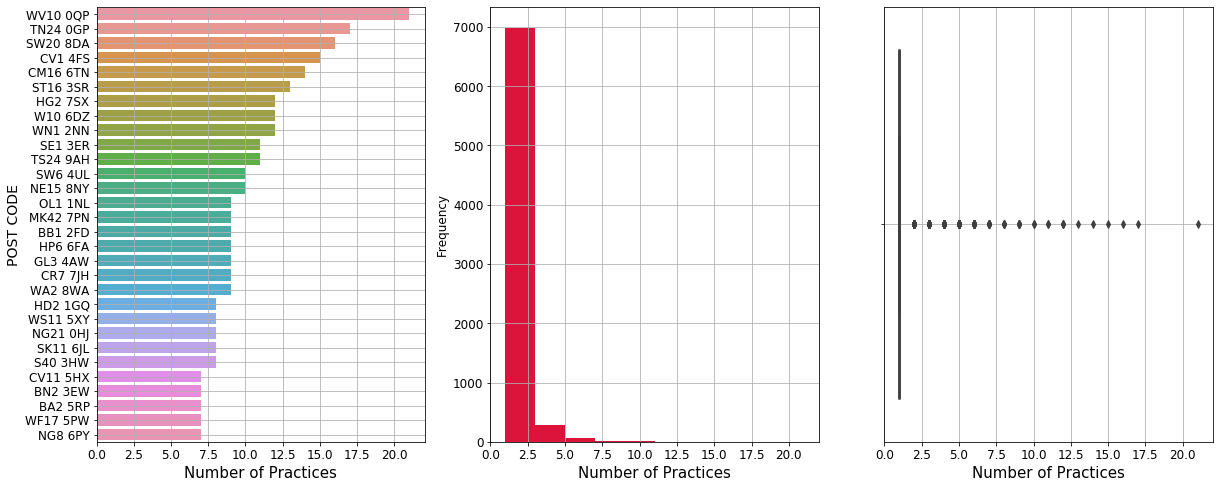

In [9]:
"Calculating the number of practices by postal code"
reduced_practice = practice_info.drop(['PERIOD','ADDR_1','ADDR_2','ADDR_3','ADDR_4'], axis = 1)
reduced_practice.rename(index=str, columns={"CODE": "PRACTICE"},inplace=True)

#print(len(reduced_practice['PRACTICE'].unique()))
#postal_practice = reduced_practice.groupby('POST CODE').agg({'PRACTICE':'count'})\
                  #.apply(lambda x: sorted(x)[0])
    
postal_practice = reduced_practice.groupby('POST CODE').agg({'PRACTICE':'count'})    
postal_practice.sort_values("PRACTICE", axis = 0, ascending = False, 
                 inplace = True, na_position ='last') 


"Plotting the distribution"
N = 30
plt.subplots(figsize=(20, 8))
plt.subplot(131)
tmp = postal_practice.reset_index().iloc[0:N,:] # Max N values of the frame
sns.barplot(x="PRACTICE",y="POST CODE", data=tmp)
plt.grid()
plt.xlabel("Number of Practices",fontsize=15)

plt.subplot(132)
postal_practice['PRACTICE'].hist(bins=10,color='crimson',grid=True,xlabelsize=12,ylabelsize=12)
plt.xlabel("Number of Practices",fontsize=15)
plt.ylabel("Frequency",fontsize=12)

plt.subplot(133)
sns.boxplot(x=postal_practice['PRACTICE'],linewidth=2.5)
plt.grid()
plt.xlabel("Number of Practices", fontsize=15)

The distribution looks like a delta function where most of the postal codes have only one practice. It will be useful to tag places on a map where there  are most number of doctors.

In [10]:
import folium
#import requests
import geocoder
from folium import Map, Marker, GeoJson, LayerControl


In [11]:
loc = tmp['POST CODE'].apply(geocoder.osm)
doctors_map = Map(location=[loc[0].lat,loc[0].lng],zoom_start=10)

for idx in range(10):
    latlng = [loc[idx].lat,loc[idx].lng]
    locadd = loc[idx].address
    doctors_map.add_child(Marker(location=latlng, 
                                 popup=locadd, icon = folium.Icon(icon='glyphicon-plus', 
                                                                  prefix='glyphicon',
                                                                  color = 'red')))
doctors_map    

In [12]:
"Merging File 1 and File 2 to get items information and postal code information"

reduced_practice = practice_info.drop(['PERIOD','ADDR_1','ADDR_2','ADDR_3','ADDR_4'], axis = 1)
reduced_practice.rename(index=str, columns={"CODE": "PRACTICE"},inplace=True)

reduced_presc_info = presc_info.drop(['SHA','PCT','BNF NAME','NIC','ACT COST','QUANTITY','PERIOD'], axis = 1)
all_by_postal      = reduced_presc_info.merge(reduced_practice, on=['PRACTICE'])

all_by_postal.head()

,PRACTICE,BNF CODE,ITEMS,NAME,POST CODE
0,N81002,0101010G0BCABAB,1,KENMORE MEDICAL CENTRE,SK9 1PA
1,N81002,0101021B0AAALAL,5,KENMORE MEDICAL CENTRE,SK9 1PA
2,N81002,0101021B0AAAPAP,1,KENMORE MEDICAL CENTRE,SK9 1PA
3,N81002,0101021B0BEACAH,1,KENMORE MEDICAL CENTRE,SK9 1PA
4,N81002,0101021B0BEADAJ,3,KENMORE MEDICAL CENTRE,SK9 1PA


It is important to find number of items distribution by region. If you have that infomation, medical supply agents can reach areas where maximum number of items are prescribed and can promote their products among practices. 
Also, it is natural to think that number of practices and number of items prescribed are positively correlate (by region). I also decided to check that relationship as well.

Text(0.5, 0, 'Number of ITEMS')

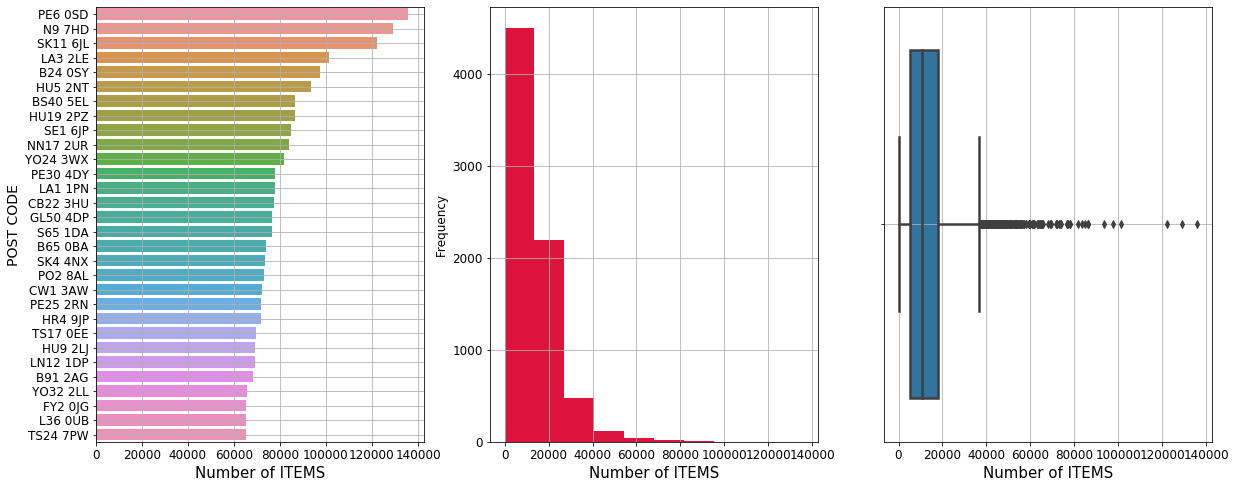

In [13]:
"Number of items by region"
#Number of practices by postal code
#postal_items = all_by_postal.groupby('POST CODE').agg({'ITEMS':'sum'})\
                  #.apply(lambda x: sorted(x, reverse=True))
postal_items = all_by_postal.groupby('POST CODE').agg({'ITEMS':'sum'})    
postal_items.sort_values("ITEMS", axis = 0, ascending = False, 
                 inplace = True, na_position ='last') 

"Plotting the distribution"
plt.subplots(figsize=(20, 8))
plt.subplot(131)
tmp_ = postal_items.reset_index().iloc[0:30,:]
sns.barplot(x="ITEMS",y="POST CODE", data=tmp_)
plt.grid()
plt.xlabel("Number of ITEMS",fontsize=15)

plt.subplot(132)
postal_items['ITEMS'].hist(bins=10,color='crimson',grid=True,xlabelsize=12,ylabelsize=12)
plt.xlabel("Number of ITEMS",fontsize=15)
plt.ylabel("Frequency",fontsize=12)

plt.subplot(133)
sns.boxplot(x=postal_items['ITEMS'],linewidth=2.5)
plt.grid()
plt.xlabel("Number of ITEMS", fontsize=15)

#Generating a Heat Map


In [14]:
from folium import plugins
loc_items = tmp_['POST CODE'].apply(geocoder.osm)

In [15]:
"Generating a heatmap for item density"
normalize_c = tmp_['ITEMS'].sum()
post_items  = []
x = [loc_items[0].lat,loc_items[0].lng,tmp_['ITEMS'][0]]


for idx in range(len(tmp_)):
    ele = [loc_items[idx].lat,loc_items[idx].lng, float(100*tmp_['ITEMS'][idx]/normalize_c)]
    post_items.append(ele)

items_map = Map(location=[loc_items[0].lat,loc_items[0].lng],zoom_start=6)
plugins.HeatMap(post_items,radius=15).add_to(items_map)
items_map

#HeatMap(data, name=None, min_opacity=0.5, max_zoom=18, max_val=1.0, radius=25, 
        #blur=15, gradient=None, overlay=True, control=True, show=True, **kwargs)¶

C:\Anaconda3\envs\tf2\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


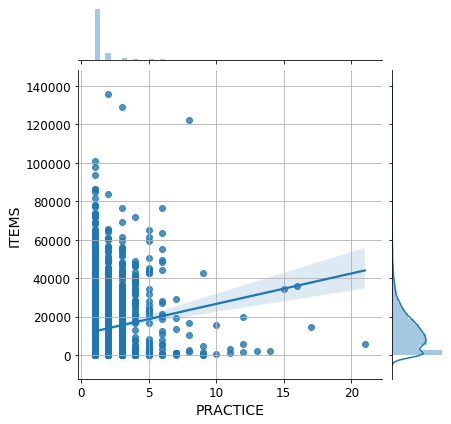

In [16]:
df1 = postal_practice.sort_index()
df2 = postal_items.sort_index()
cor_data = pd.concat([df1, df2], axis=1).reindex(df1.index)
sns.jointplot("PRACTICE","ITEMS",data=cor_data, kind="reg")
plt.grid()

## Finding the consumer growth rate

In [17]:
print(color.bold +"Loading prescribing data file (File 2)- for months of July to December - 2019")

#presc_info_June = pd.read_csv('./2019_June/2019_Jun_Practice_Prescribing_Data.csv',index_col=False)
#print(color.blue + color.bold + color.underline + 'Prescription Data:' + color.end)
#presc_info_June.info()
#presc_info_June.sort_values('PRACTICE').head(2)

#presc_info_Jul = pd.read_csv('./2019_July/2019_Jul_Practice_Prescribing_Data.csv',index_col=False)
#presc_info_Aug = pd.read_csv('./2019_August/2019_Aug_Practice_Prescribing_Data.csv',index_col=False)
#presc_info_Sep = pd.read_csv('./2019_September/2019_Sep_Practice_Prescribing_Data.csv',index_col=False)
presc_info_Oct = pd.read_csv('./2019_October/2019_Oct_Practice_Prescribing_Data.csv',index_col=False)
presc_info_Nov = pd.read_csv('./2019_November/2019_Nov_Practice_Prescribing_Data.csv',index_col=False)

Loading prescribing data file (File 2)- for months of July to December - 2019


In [18]:
" Loadig the pickle files"

#pres_jun_19 = pd.read_pickle("data/jun19.pkl")
#pres_jul_19 = pd.read_pickle("data/jul19.pkl")
#pres_aug_19 = pd.read_pickle("data/aug19.pkl")
#pres_sep_19 = pd.read_pickle("data/sep19.pkl")
#pres_oct_19 = pd.read_pickle("data/oct19.pkl")
#pres_nov_19 = pd.read_pickle("data/nov19.pkl")
#pres_dec_19 = pd.read_pickle("data/dec19.pkl")

#pres_jun_19 = presc_info_June
#pres_jul_19 = presc_info_Jul
#pres_aug_19 = presc_info_Aug
#pres_sep_19 = presc_info_Sep
pres_oct_19 = presc_info_Oct
pres_nov_19 = presc_info_Nov
pres_dec_19  = presc_info

#Wrtie to pickle files 
#pres_jun_19.to_pickle("data/jun19.pkl")
#pres_jul_19.to_pickle("data/jul19.pkl")
#pres_aug_19.to_pickle("data/aug19.pkl")
#pres_sep_19.to_pickle("data/sep19.pkl")
#pres_oct_19.to_pickle("data/oct19.pkl")
#pres_nov_19.to_pickle("data/nov19.pkl")
#pres_dec_19.to_pickle("data/dec19.pkl")

In [19]:
# jun_19 = pres_jun_19.groupby('BNF CODE').agg({'ITEMS':'sum'})
# jul_19 = pres_jul_19.groupby('BNF CODE').agg({'ITEMS':'sum'})
# aug_19 = pres_aug_19.groupby('BNF CODE').agg({'ITEMS':'sum'})
# sep_19 = pres_sep_19.groupby('BNF CODE').agg({'ITEMS':'sum'})
oct_19 = pres_oct_19.groupby('BNF CODE').agg({'ITEMS':'sum'})
nov_19 = pres_nov_19.groupby('BNF CODE').agg({'ITEMS':'sum'})
dec_19 = pres_dec_19.groupby('BNF CODE').agg({'ITEMS':'sum'})

# jun_19.rename(columns={'ITEMS':'ITEMS_JUN'},inplace=True)
# jul_19.rename(columns={'ITEMS':'ITEMS_JUL'},inplace=True)
# aug_19.rename(columns={'ITEMS':'ITEMS_AUG'},inplace=True)
# sep_19.rename(columns={'ITEMS':'ITEMS_SEP'},inplace=True)
oct_19.rename(columns={'ITEMS':'ITEMS_OCT'},inplace=True)
nov_19.rename(columns={'ITEMS':'ITEMS_NOV'},inplace=True)
dec_19.rename(columns={'ITEMS':'ITEMS_DEC'},inplace=True)


In [20]:
'Inner join datasets from June to December to get common medicines prscribed over last half of 2019'
from functools import reduce
#dfs = [jun_19, jul_19, aug_19, sep_19, oct_19, nov_19, dec_19]
dfs = [oct_19,nov_19, dec_19]
df_final = reduce(lambda left,right: pd.merge(left,right,left_index=True,right_index=True, how='inner'), dfs)

In [21]:
'Prescirptions over three months'
df_final.head()

'Calculating growth rates over six months'
percent_change = df_final.pct_change(axis='columns').drop(['ITEMS_OCT'], axis=1) 
# drop the first month according  to the data files you are using

percent_change['PERC_MEAN'] = percent_change.mean(axis=1)
percent_change.sort_values("PERC_MEAN", axis = 0, ascending = False, 
                 inplace = False, na_position ='last').head(20)

,ITEMS_NOV,ITEMS_DEC,PERC_MEAN
BNF CODE,,,
0409020N0AAAIAI,28.000000,-0.965517,13.517241
0702010F0AAAGAG,26.000000,0.555556,13.277778
0603020C0BBAAAB,0.000000,17.000000,8.500000
0501090S0BBAAAA,-0.500000,14.000000,6.750000
0503040B0BBACAC,8.666667,3.034483,5.850575
0503040B0AAACAC,0.954545,10.581395,5.767970
1106000AKBBABAB,0.000000,11.000000,5.500000
0503040B0AAADAD,4.000000,6.866667,5.433333
0802020G0BHACAD,10.000000,0.636364,5.318182
